## Simple Linear Regression

In [3]:
# importing basic libraries

import numpy as np

import pandas as pd

from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#import test and train file

train = pd.read_csv('https://raw.githubusercontent.com/Gurubux/StatQuest/master/Regularization-Ridge-Lasso-ElasticNet/Training.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Gurubux/StatQuest/master/Regularization-Ridge-Lasso-ElasticNet/Test.csv')

# importing linear regressionfrom sklearn

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

# splitting into training and cv for cross validation

X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

# training the model

lreg.fit(x_train,y_train)

# predicting on cv

pred = lreg.predict(x_cv)

# calculating mse

mse = np.mean((pred - y_cv)**2)
mse

2021263.4080987333

In [4]:
# calculating coefficients

coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-10.792485
1,Item_MRP,15.530444


In [5]:
lreg.score(x_cv,y_cv)

0.31676038587101896

## Multiple Linear Regression

In [6]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

#splitting into training and cv for cross validation

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)
counter_nan_train = X.isnull().sum()

## training the model
print(counter_nan_train)
lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

Outlet_Establishment_Year    0
Item_MRP                     0
Item_Weight                  0
dtype: int64


In [7]:
mse = np.mean((pred - y_cv)**2)
print(mse)

#1853431.59

## calculating coefficients

coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print(coeff)

1963571.3440739485
                           0  Coefficient Estimate
0  Outlet_Establishment_Year            -10.199593
1                   Item_MRP             15.566105
2                Item_Weight             -2.740717


In [8]:
print("RScore",lreg.score(x_cv,y_cv))#0.32942
print("Adjusted R^2 ",1 - (1-lreg.score(x_cv, y_cv))*(len(y_cv)-1)/(len(y_cv)-x_cv.shape[1]-1))

RScore 0.32454934527880197
Adjusted R^2  0.32359666452461133


In [10]:
# imputing missing values
train = pd.read_csv('https://raw.githubusercontent.com/Gurubux/StatQuest/master/Regularization-Ridge-Lasso-ElasticNet/Training.csv')
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

train['Outlet_Size'].fillna('Small',inplace=True)

# creating dummy variables to convert categorical into numeric values
print(train.shape)
mylist = list(train.select_dtypes(include=['object']).columns)
print(mylist)
dummies = pd.get_dummies(train[mylist], prefix= mylist)
#print(dummies)
train.drop(mylist, axis=1, inplace = True)
print(train.shape)
X = pd.concat([train,dummies], axis =1 )
X.shape

(8523, 12)
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
(8523, 5)


(8523, 1605)

In [0]:
X = X.drop('Item_Outlet_Sales',1)

In [12]:
X.shape

(8523, 1604)

In [13]:
print(X.shape)
X.fillna(X.mean(),inplace = True)
print(X.shape)
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

# training a linear regression model on train
print(x_train)
lreg.fit(x_train,y_train)

# predicting on cv

pred_cv = lreg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print(mse)

#1348171.96

# evaluation using r-square

print(lreg.score(x_cv,y_cv))

#0.54831541460870059

(8523, 1604)
(8523, 1604)
      Item_Weight  ...  Outlet_Type_Supermarket Type3
7135    11.600000  ...                              0
7550    20.200000  ...                              0
2336     7.605000  ...                              0
5626    15.600000  ...                              0
603     19.200000  ...                              0
6481     9.695000  ...                              0
4402    16.200000  ...                              0
4754    20.700000  ...                              0
1919    10.850000  ...                              0
5590    16.700000  ...                              0
1041    12.857645  ...                              1
5498    19.700000  ...                              0
5705    12.857645  ...                              0
453     18.250000  ...                              0
139     18.500000  ...                              0
1021    13.100000  ...                              0
3276    20.850000  ...                              0
15

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_DRA12',
       'Item_Identifier_DRA24', 'Item_Identifier_DRA59',
       'Item_Identifier_DRB01', 'Item_Identifier_DRB13',
       'Item_Identifier_DRB24',
       ...
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1604)
Outlet_Location_Type_Tier 2     -2.699052e+13
Outlet_Location_Type_Tier 3     -1.786069e+13
Outlet_Location_Type_Tier 1     -1.544199e+13
Item_Identifier_DRD49           -7.279937e+12
Item_Identifier_DRC24           -6.725494e+12
Outlet_Identifier_OUT046        -4.834903e+12
Item_Identifier_DRC01           -2.890906e+12
Item_Identifier_DRM49           -2.890906e+12
Item_I

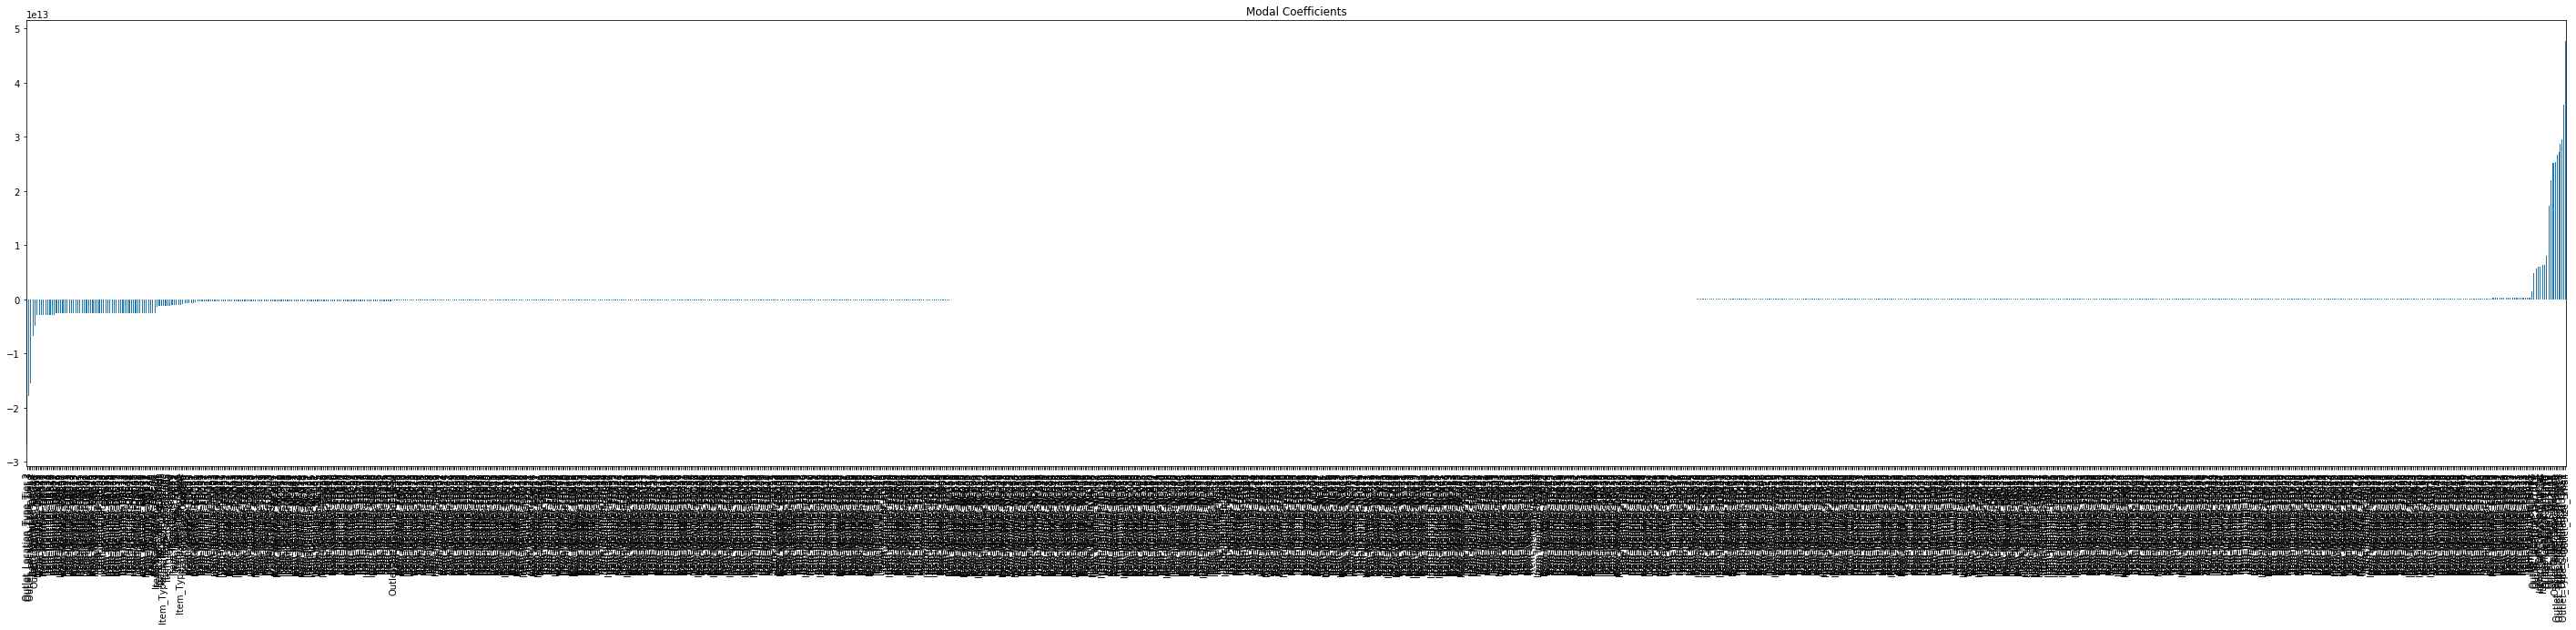

In [20]:
#checking the magnitude of coefficients
predictors = x_train.columns
print(predictors)
coef = Series(lreg.coef_,predictors).sort_values()
print(coef)
plt.figure(figsize=(50,9))
coef.plot(kind='bar', title='Modal Coefficients')

2878388.704748067
0.02434777338076133
0.02434777338076133
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_DRA12',
       'Item_Identifier_DRA24', 'Item_Identifier_DRA59',
       'Item_Identifier_DRB01', 'Item_Identifier_DRB13',
       'Item_Identifier_DRB24',
       ...
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1604)
Outlet_Location_Type_Tier 2     -2.699052e+13
Outlet_Location_Type_Tier 3     -1.786069e+13
Outlet_Location_Type_Tier 1     -1.544199e+13
Item_Identifier_DRD49           -7.279937e+12
Item_Identifier_DRC24           -6.725494e+12
Outlet_Identifier_OUT046        -4.834903e+12
Item_Identifier_DRC01           -2.89090

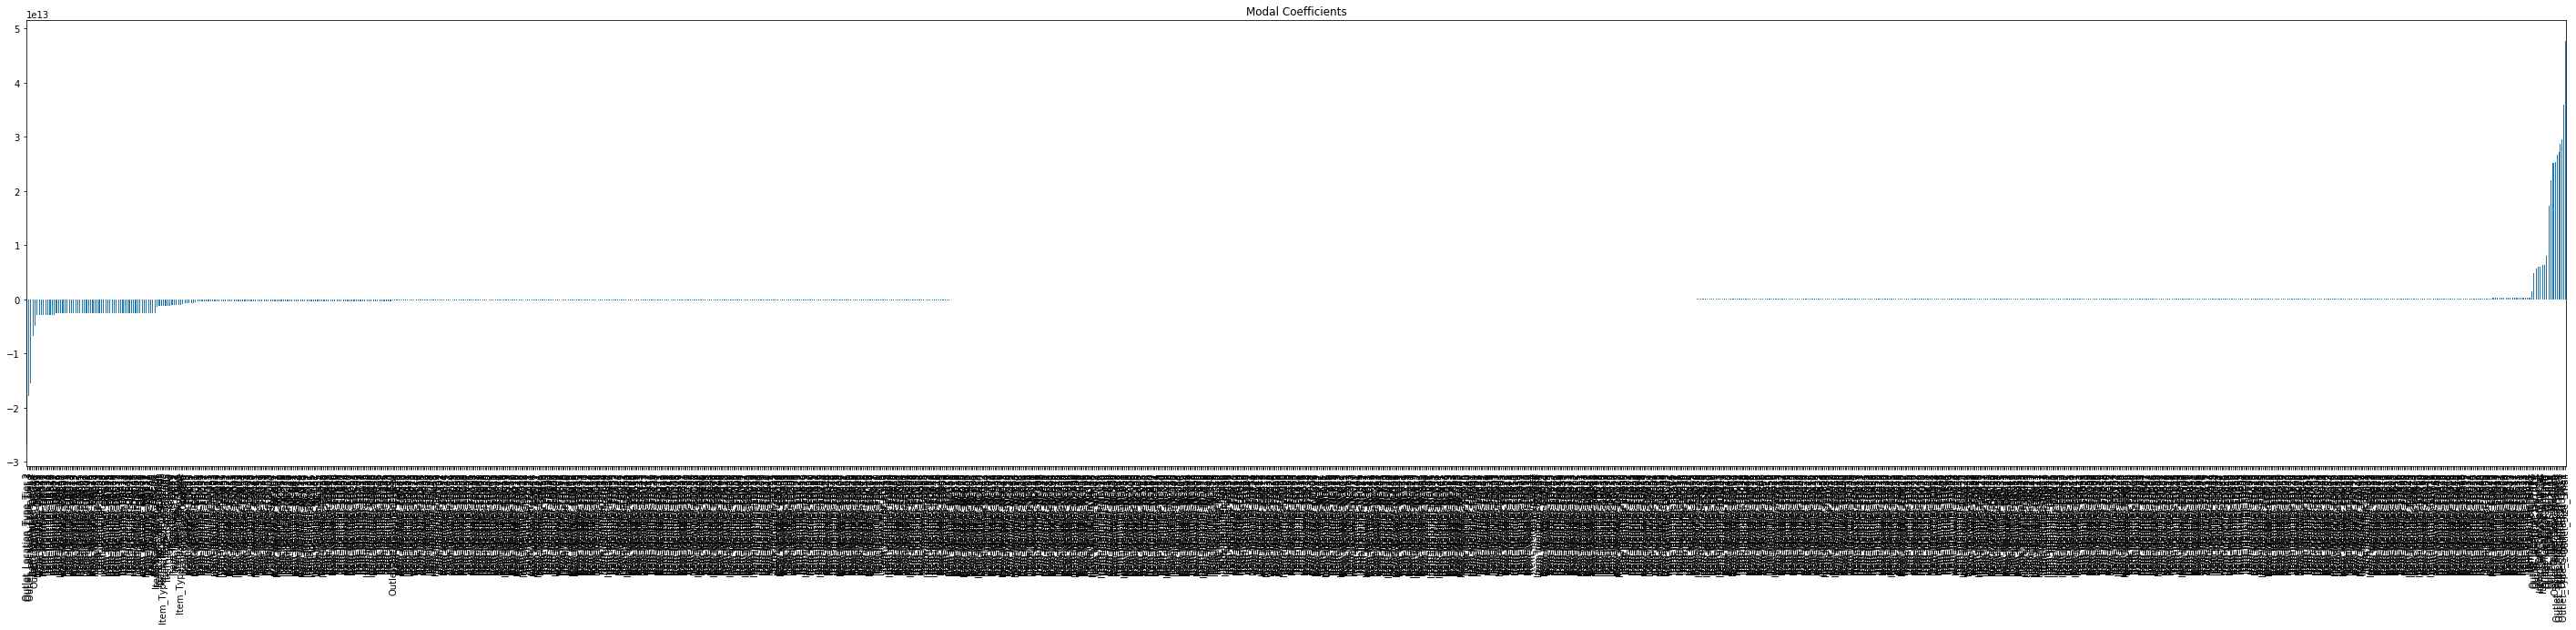

In [21]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=100, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

#calculating mse

mse = np.mean((pred - y_cv)**2)

print(mse)

print(ridgeReg.score(x_cv,y_cv))
from sklearn.metrics import r2_score
print(r2_score(y_cv,pred))
#1348171.96 ## calculating score ridgeReg.score(x_cv,y_cv) 0.5691

predictors = x_train.columns
print(predictors)
coef = Series(lreg.coef_,predictors).sort_values()
print(coef)
plt.figure(figsize=(50,9))
coef.plot(kind='bar', title='Modal Coefficients')

1562202.4820413326
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_DRA12',
       'Item_Identifier_DRA24', 'Item_Identifier_DRA59',
       'Item_Identifier_DRB01', 'Item_Identifier_DRB13',
       'Item_Identifier_DRB24',
       ...
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1604)
Item_Weight                      0.000000
Item_Identifier_FDW07           -0.000000
Item_Identifier_FDW04            0.000000
Item_Identifier_FDW03            0.000000
Item_Identifier_FDW02            0.000000
Item_Identifier_FDW01           -0.000000
Item_Identifier_FDV60            0.000000
Item_Identifier_FDV59            0.000000
Item_Identifier_FDV

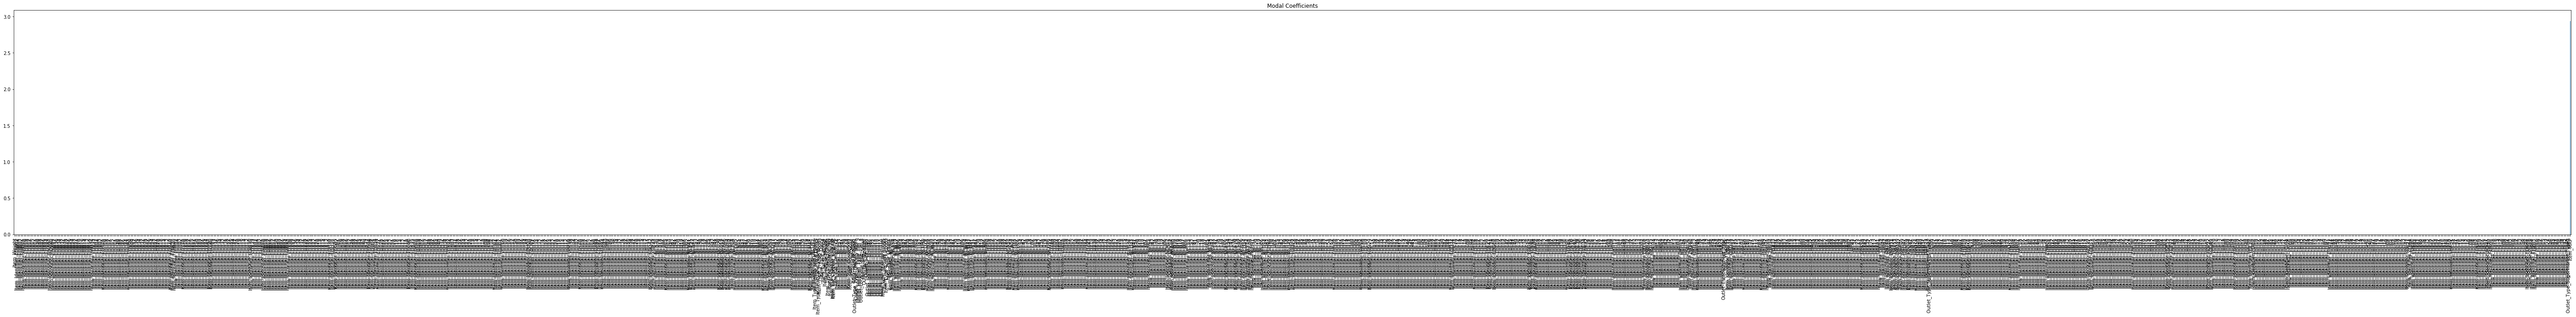

In [22]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=10, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print(mse)

#1346205.82

lassoReg.score(x_cv,y_cv)

#0.5720
predictors = x_train.columns
print(predictors)
coef = Series(lassoReg.coef_,predictors).sort_values()
print(coef)
plt.figure(figsize=(100,9))
coef.plot(kind='bar', title='Modal Coefficients')

1562202.4820413326
0.4704793249363688
[1427.91393611  922.29380934 2329.54726332 ... 4113.66139953  823.96575575
 1687.29990053]
Item_Weight                      0.000000
Item_Identifier_FDW07           -0.000000
Item_Identifier_FDW04            0.000000
Item_Identifier_FDW03            0.000000
Item_Identifier_FDW02            0.000000
Item_Identifier_FDW01           -0.000000
Item_Identifier_FDV60            0.000000
Item_Identifier_FDV59            0.000000
Item_Identifier_FDV58            0.000000
Item_Identifier_FDV57            0.000000
Item_Identifier_FDV56           -0.000000
Item_Identifier_FDV55           -0.000000
Item_Identifier_FDV52           -0.000000
Item_Identifier_FDV51            0.000000
Item_Identifier_FDV50           -0.000000
Item_Identifier_FDV49            0.000000
Item_Identifier_FDV48           -0.000000
Item_Identifier_FDV47           -0.000000
Item_Identifier_FDV46            0.000000
Item_Identifier_FDV45            0.000000
Item_Identifier_FDV44          

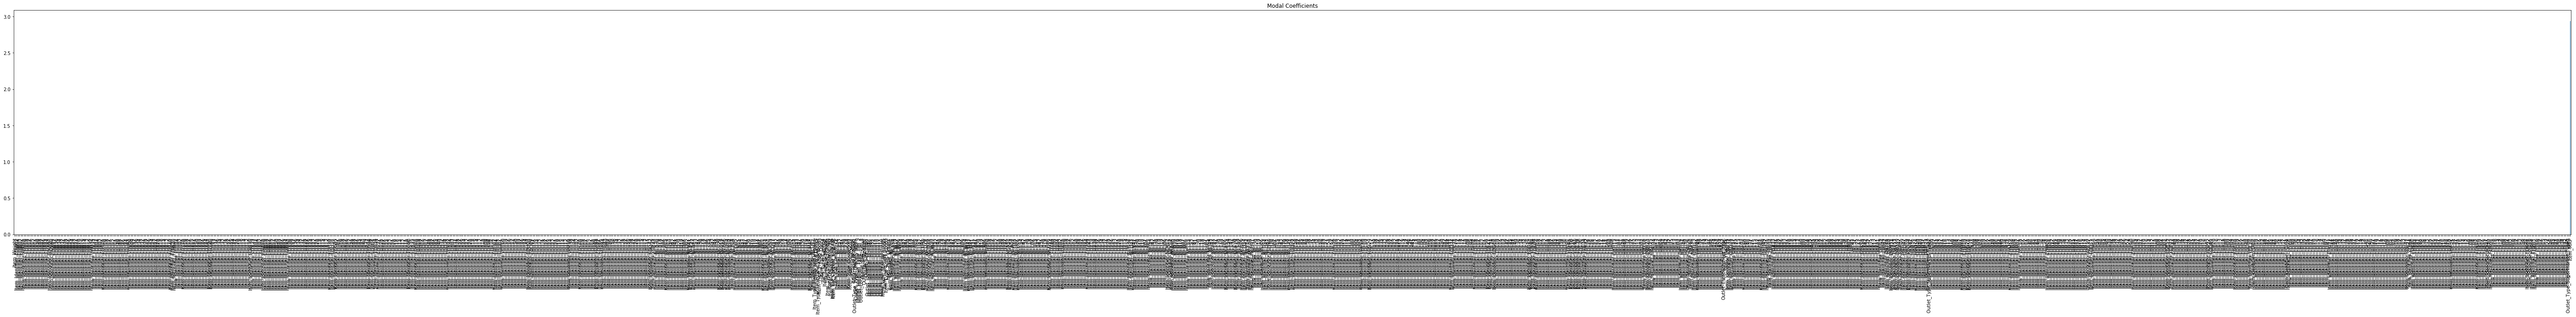

In [23]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print(mse )
#1773750.73

print(ENreg.score(x_cv,y_cv))

#0.4504

predictors = x_train.columns
print(pred_cv)
coef = Series(lassoReg.coef_,predictors).sort_values()
print(coef)
plt.figure(figsize=(100,9))
coef.plot(kind='bar', title='Modal Coefficients')